In [149]:
#--------- IMPORTS --------------

import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.graph_objects as go

#--------- IMPORTS --------------

In [150]:
#--------- Display Fish DB --------------

fish = pd.read_csv("data/fish.csv", sep=',')
fish = fish.iloc[:, :-12]
fish = fish.drop(columns=['Critterpedia Image', 'Furniture Image'])
fish["Name"] = fish["Name"].apply(lambda x: x.upper())
fish

,_id,Name,Icon Image,Sell,Where/How,Shadow,Catch Difficulty,Vision,Total Catches to Unlock,Spawn Rates,...,SH May,SH Jun,SH Jul,SH Aug,SH Sep,SH Oct,SH Nov,SH Dec,Size,Surface
0,56.0,ANCHOVY,https://acnhcdn.com/latest/MenuIcon/Fish81.png,200.0,Sea,Small,Very Easy,Very Wide,0.0,2–5,...,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,1x1,No
1,36.0,ANGELFISH,https://acnhcdn.com/latest/MenuIcon/Fish30.png,3000.0,River,Small,Easy,Medium,20.0,2–5,...,NaN,NaN,NaN,NaN,NaN,NaN,4 PM – 9 AM,4 PM – 9 AM,1x1,Yes
2,44.0,ARAPAIMA,https://acnhcdn.com/latest/MenuIcon/Fish36.png,10000.0,River,XX-Large,Very Hard,Narrow,50.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 PM – 9 AM,3x2,No
3,41.0,AROWANA,https://acnhcdn.com/latest/MenuIcon/Fish33.png,10000.0,River,Large,Very Hard,Medium,50.0,1–2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 PM – 9 AM,2x1,Yes
4,58.0,BARRED KNIFEJAW,https://acnhcdn.com/latest/MenuIcon/Fish47.png,5000.0,Sea,Medium,Hard,Medium,20.0,3–5,...,All day,NaN,NaN,NaN,All day,All day,All day,All day,1x1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,23.0,TILAPIA,https://acnhcdn.com/latest/MenuIcon/Fish76.png,800.0,River,Medium,Hard,Medium,0.0,7–9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,All day,1x1,Yes
76,66.0,TUNA,https://acnhcdn.com/latest/MenuIcon/Fish57.png,7000.0,Pier,XX-Large,Very Hard,Narrow,50.0,2,...,All day,All day,All day,All day,All day,All day,NaN,NaN,2x1,Yes
77,75.0,WHALE SHARK,https://acnhcdn.com/latest/MenuIcon/Fish72.png,13000.0,Sea,X-Large w/Fin,Very Hard,Very Narrow,50.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,All day,3x2,No
78,21.0,YELLOW PERCH,https://acnhcdn.com/latest/MenuIcon/Fish18.png,300.0,River,Medium,Medium,Narrow,0.0,7–10,...,All day,All day,All day,All day,All day,NaN,NaN,NaN,1x1,Yes


In [151]:
#--------- Mean functions for correlations --------------

def get_mean(difficulty):
    mask = fish['Catch Difficulty'] == difficulty
    filtered_fish = fish[mask]
    return int(filtered_fish["Sell"].mean())

mean = []
list_difficulty = ["Very Easy", "Easy", "Medium", "Hard", "Very Hard"]

for i in list_difficulty :
    mean.append(get_mean(i))
mean

#----------------------------

def get_mean_vision(vision):
    mask = fish['Vision'] == vision
    filtered_fish = fish[mask]
    return int(filtered_fish["Sell"].mean())

mean_vision = []
list_vision = ["Very Wide", "Wide", "Medium", "Narrow", "Very Narrow"]

for i in list_vision:
    mean_vision.append(get_mean_vision(i))
mean_vision

[685, 1040, 2240, 5058, 8935]

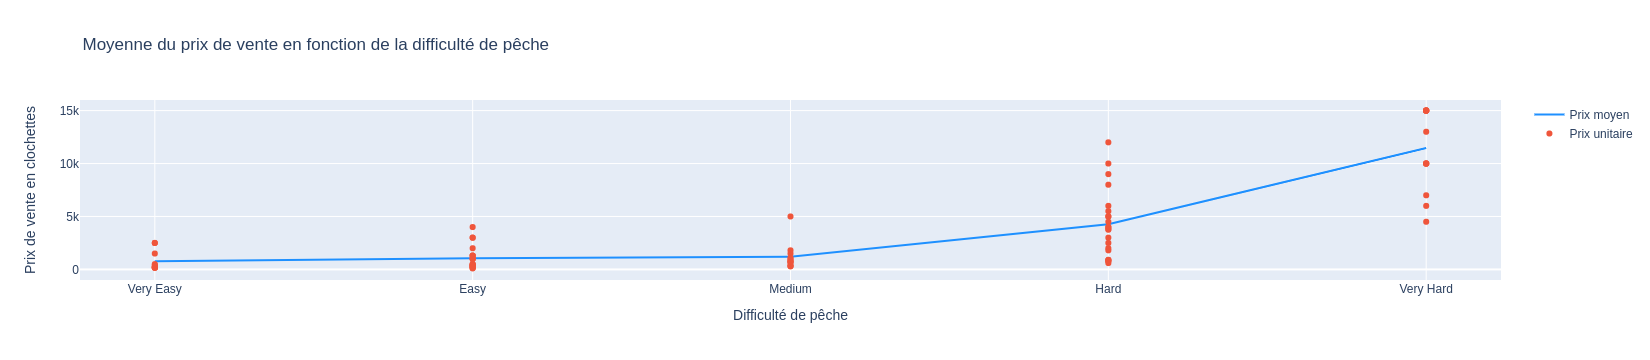

In [152]:
#--------- CATCH DIFFICULTY X SELL PRICE PLOT --------------

trace1 = go.Scatter(
    x = list_difficulty,
    y = mean,
    name = 'Prix moyen',
    mode='lines',
    line = {'color':'dodgerblue'}
)

trace2 = go.Scatter(
    x = fish["Catch Difficulty"],
    y = fish["Sell"],
    text = "Nom du poisson : " + fish["Name"],
    name = "Prix unitaire",
    mode = 'markers'
)

layout = go.Layout(
    title = 'Moyenne du prix de vente en fonction de la difficulté de pêche',
    yaxis = dict(
        title = 'Prix de vente en clochettes',
        range = (-1000, 16000),
    ),
    xaxis = dict(
        title = 'Difficulté de pêche',
    ),
    dragmode = 'pan',
)

config = {
    'scrollZoom': True,
    'modeBarButtonsToRemove': ['sendDataToCloud',],
    'showLink':False,
}

fig = go.Figure(data = [trace1, trace2], layout=layout)
py.iplot(fig, config=config)

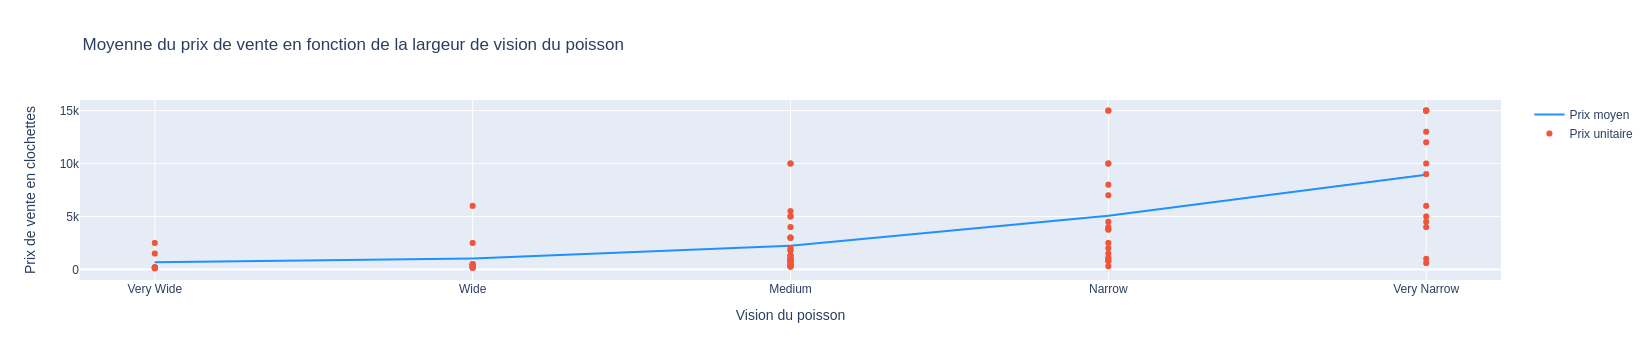

In [153]:
#--------- FISH VISION OF FISHING LINE X SELL PRICE PLOT --------------

trace1 = go.Scatter(
    x = list_vision,
    y = mean_vision,
    name = 'Prix moyen',
    mode='lines',
    line = {'color':'dodgerblue'}
)

trace2 = go.Scatter(
    x = fish["Vision"],
    y = fish["Sell"],
    text = "Nom du poisson : " + fish["Name"],
    name = "Prix unitaire",
    mode = 'markers'
)

layout = go.Layout(
    title = 'Moyenne du prix de vente en fonction de la largeur de vision du poisson',
    yaxis = dict(
        title = 'Prix de vente en clochettes',
        range = (-1000, 16000),
    ),
    xaxis = dict(
        title = 'Vision du poisson',
    ),
    dragmode = 'pan',
)

config = {
    'scrollZoom': True,
    'modeBarButtonsToRemove': ['sendDataToCloud',],
    'showLink':False,
}

fig = go.Figure(data = [trace1, trace2], layout=layout)
py.iplot(fig, config=config)

Correlation evidente entre la vision des poissons de la ligne de peche (spotted de + ou - moins selon le poisson) et la difficulte de peche.
=> En moyenne, + grande difficulte de peche = plus petite vision du poisson donc besoin de plus de precision dans le lancer de la ligne